The minimum number of neural-network layers for classification of separable features

The XOR problem

In [1]:
import numpy as np
np.random.seed(123)

In [2]:
# Generate Data
npts = 100 # per blob
tot_npts = 4*npts
s = 0.01
sigma = np.array([[s, 0], [0, s]])

data1 = np.random.multivariate_normal( [0,0], sigma, npts)
data2 = np.random.multivariate_normal( [1,1], sigma, npts)
data3 = np.random.multivariate_normal( [0,1], sigma, npts)
data4 = np.random.multivariate_normal( [1,0], sigma, npts)

xor_data = np.concatenate((data1, data2, data3, data4))
xor_labels = np.concatenate((np.ones((npts*2)),np.zeros((npts*2))))

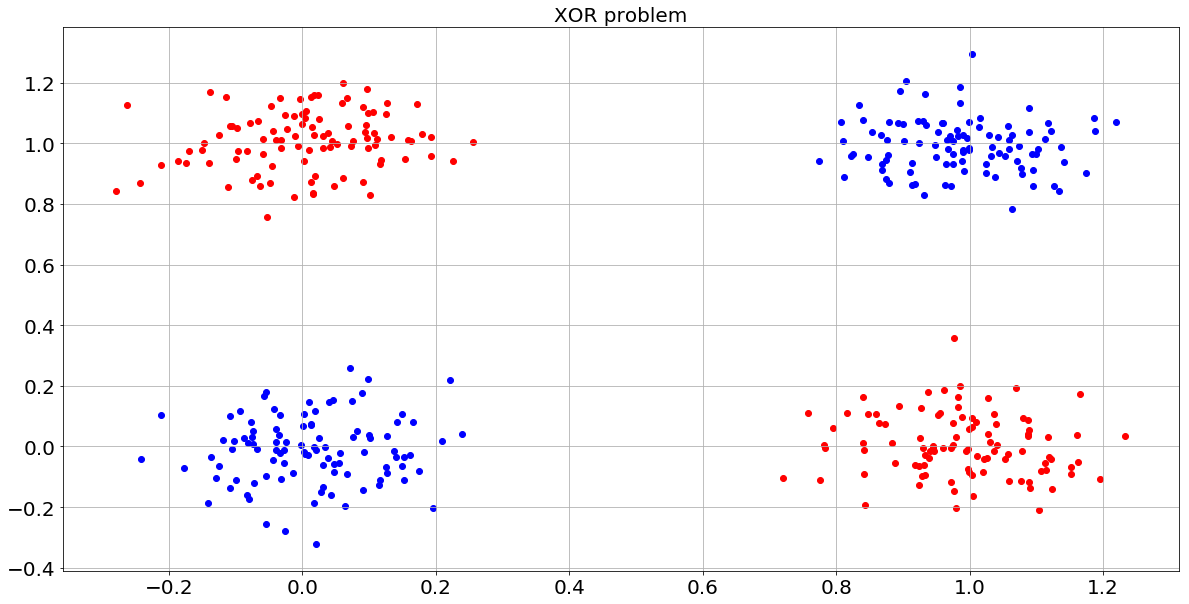

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(xor_data[:2*npts,0], xor_data[:2*npts,1],c='b')
plt.scatter(xor_data[2*npts:,0], xor_data[2*npts:,1],c='r')
plt.title('XOR problem',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid('on')
plt.show()

dev_train_data = train_data[:int(tot_npts/5),:]
partial_train_data = train_data[int(tot_npts/5):,:]

dev_train_labels = train_labels[:int(tot_npts/5)]
partial_train_labels = train_labels[int(tot_npts/5):]

print(dev_train_data.shape)
print(partial_train_data.shape)
print(dev_train_labels.shape)
print(partial_train_labels.shape)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(xor_data, 
                    xor_labels, 
                    epochs=200,
                    batch_size=32) 

/Users/nc374/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
400/400 [==============================] - 0s 342us/step - loss: 0.7812 - acc: 0.4500
Epoch 2/200
400/400 [==============================] - 0s 96us/step - loss: 0.7717 - acc: 0.4375
Epoch 3/200
400/400 [==============================] - 0s 90us/step - loss: 0.7632 - acc: 0.4275
Epoch 4/200
400/400 [==============================] - 0s 76us/step - loss: 0.7543 - acc: 0.4200
Epoch 5/200
400/400 [==============================] - 0s 79us/step - loss: 0.7469 - acc: 0.4050
Epoch 6/200
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 64us/step - loss: 0.4737 - acc: 0.9950
Epoch 78/200
400/400 [==============================] - ETA: 0s - loss: 0.4653 - acc: 1.000 - 0s 60us/step - loss: 0.4709 - acc: 0.9950
Epoch 79/200
400/400 [==============================] - 0s 61us/step - loss: 0.4681 - acc: 0.9950
Epoch 80/200
400/400 [==============================] - 0s 71us/step - loss: 0.4653 - acc: 0.9950
Epoch 81/200
400/400 [==============================] - 0s 73us/step - loss: 0.4625 - acc: 0.9950
Epoch 82/200
400/400 [==============================] - 0s 74us/step - loss: 0.4597 - acc: 0.9950
Epoch 83/200
400/400 [==============================] - 0s 70us/step - loss: 0.4571 - acc: 0.9950
Epoch 84/200
400/400 [==============================] - 0s 78us/step - loss: 0.4542 - acc: 0.9950
Epoch 85/200
400/400 [==============================] - 0s 68us/step - loss: 0.4514 - acc: 0.9950
Epoch 86/200
400/400 [==============================] - 0s 77us/step - loss: 0.4487 - acc: 0.

400/400 [==============================] - 0s 63us/step - loss: 0.2647 - acc: 1.0000
Epoch 160/200
400/400 [==============================] - 0s 69us/step - loss: 0.2626 - acc: 1.0000
Epoch 161/200
400/400 [==============================] - 0s 64us/step - loss: 0.2605 - acc: 1.0000
Epoch 162/200
400/400 [==============================] - 0s 86us/step - loss: 0.2585 - acc: 1.0000
Epoch 163/200
400/400 [==============================] - 0s 65us/step - loss: 0.2564 - acc: 1.0000
Epoch 164/200
400/400 [==============================] - 0s 58us/step - loss: 0.2544 - acc: 1.0000
Epoch 165/200
400/400 [==============================] - 0s 68us/step - loss: 0.2524 - acc: 1.0000
Epoch 166/200
400/400 [==============================] - 0s 59us/step - loss: 0.2504 - acc: 1.0000
Epoch 167/200
400/400 [==============================] - 0s 71us/step - loss: 0.2484 - acc: 1.0000
Epoch 168/200
400/400 [==============================] - 0s 69us/step - loss: 0.2465 - acc: 1.0000
Epoch 169/200
400/400 [=

history = model.fit(partial_train_data, 
                    partial_train_labels, 
                    epochs=2000,
                    batch_size=64,
                    validation_data=(dev_train_data, dev_train_labels))                       
#print(model.predict(X))

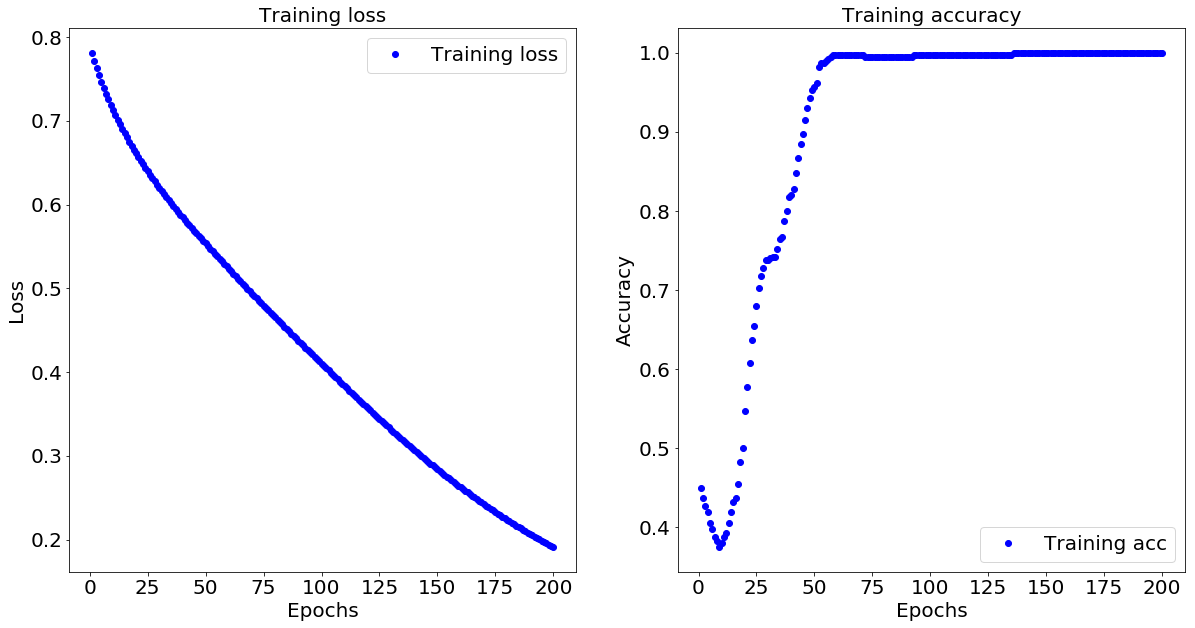

In [5]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(121)
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.subplot(122)
acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
#plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The two-moon problem

In [6]:
import sklearn.datasets as sk  
tm_data, tm_labels = sk.make_moons(n_samples=400, shuffle=True, noise=0.05, random_state=0)
print(tm_data.shape)
print(tm_labels.shape)

(400, 2)
(400,)


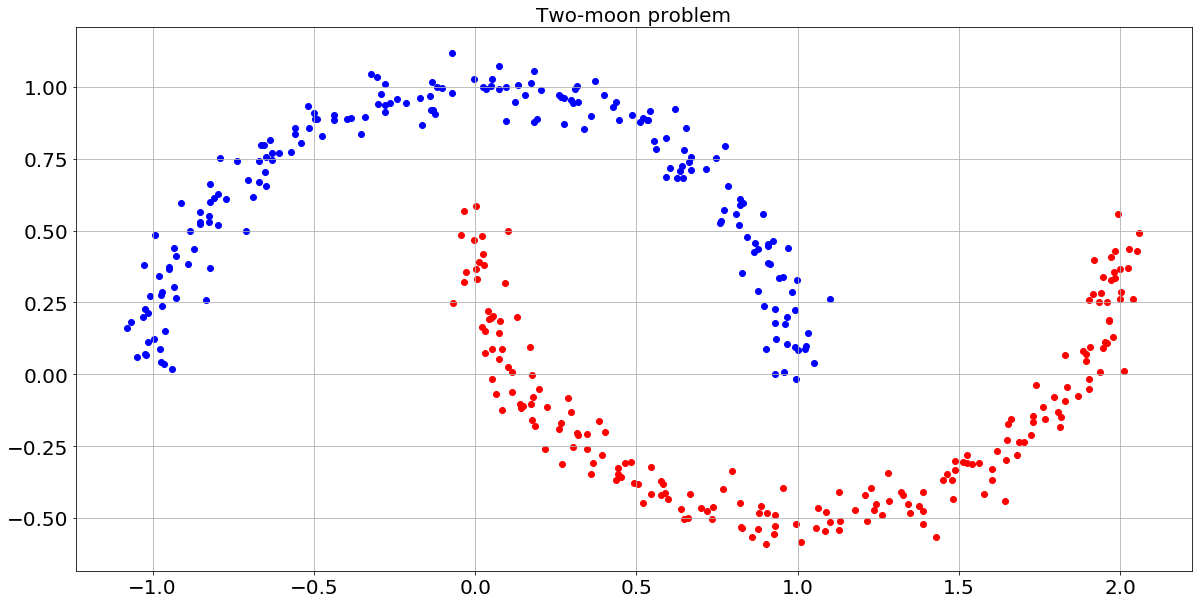

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(tm_data[:,0][tm_labels==0],tm_data[:,1][tm_labels==0],c='b')
plt.scatter(tm_data[:,0][tm_labels==1],tm_data[:,1][tm_labels==1],c='r')
plt.title('Two-moon problem',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid('on')
plt.show()

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(tm_data, 
                    tm_labels, 
                    epochs=400,
                    batch_size=32) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
400/400 [==============================] - 0s 408us/step - loss: 0.7362 - acc: 0.3775
Epoch 2/400
400/400 [==============================] - 0s 106us/step - loss: 0.7304 - acc: 0.1175
Epoch 3/400
400/400 [==============================] - 0s 102us/step - loss: 0.7254 - acc: 0.1050
Epoch 4/400
400/400 [==============================] - 0s 95us/step - loss: 0.7208 - acc: 0.0925
Epoch 5/400
400/400

400/400 [==============================] - 0s 62us/step - loss: 0.6932 - acc: 0.5000
Epoch 77/400
400/400 [==============================] - 0s 72us/step - loss: 0.6932 - acc: 0.5000
Epoch 78/400
400/400 [==============================] - 0s 56us/step - loss: 0.6932 - acc: 0.5000
Epoch 79/400
400/400 [==============================] - 0s 63us/step - loss: 0.6932 - acc: 0.5000
Epoch 80/400
400/400 [==============================] - 0s 80us/step - loss: 0.6932 - acc: 0.4800
Epoch 81/400
400/400 [==============================] - 0s 73us/step - loss: 0.6932 - acc: 0.5000
Epoch 82/400
400/400 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.5000
Epoch 83/400
400/400 [==============================] - 0s 78us/step - loss: 0.6932 - acc: 0.4750
Epoch 84/400
400/400 [==============================] - 0s 73us/step - loss: 0.6932 - acc: 0.5000
Epoch 85/400
400/400 [==============================] - 0s 75us/step - loss: 0.6932 - acc: 0.5000
Epoch 86/400
400/400 [===========

400/400 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000
Epoch 160/400
400/400 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000
Epoch 161/400
400/400 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000
Epoch 162/400
400/400 [==============================] - 0s 78us/step - loss: 0.6932 - acc: 0.5000
Epoch 163/400
400/400 [==============================] - 0s 79us/step - loss: 0.6932 - acc: 0.5000
Epoch 164/400
400/400 [==============================] - 0s 73us/step - loss: 0.6932 - acc: 0.5000
Epoch 165/400
400/400 [==============================] - 0s 78us/step - loss: 0.6932 - acc: 0.5000
Epoch 166/400
400/400 [==============================] - 0s 74us/step - loss: 0.6932 - acc: 0.4600
Epoch 167/400
400/400 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.4800
Epoch 168/400
400/400 [==============================] - 0s 64us/step - loss: 0.6932 - acc: 0.5000
Epoch 169/400
400/400 [=

400/400 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000
Epoch 242/400
400/400 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000
Epoch 243/400
400/400 [==============================] - 0s 62us/step - loss: 0.6932 - acc: 0.5000
Epoch 244/400
400/400 [==============================] - 0s 76us/step - loss: 0.6932 - acc: 0.4700
Epoch 245/400
400/400 [==============================] - 0s 67us/step - loss: 0.6932 - acc: 0.4950
Epoch 246/400
400/400 [==============================] - 0s 75us/step - loss: 0.6931 - acc: 0.5000
Epoch 247/400
400/400 [==============================] - 0s 71us/step - loss: 0.6931 - acc: 0.4900
Epoch 248/400
400/400 [==============================] - 0s 73us/step - loss: 0.6932 - acc: 0.5000
Epoch 249/400
400/400 [==============================] - 0s 75us/step - loss: 0.6932 - acc: 0.5000
Epoch 250/400
400/400 [==============================] - 0s 73us/step - loss: 0.6932 - acc: 0.4850
Epoch 251/400
400/400 [=

400/400 [==============================] - 0s 69us/step - loss: 0.6932 - acc: 0.5000
Epoch 324/400
400/400 [==============================] - 0s 66us/step - loss: 0.6932 - acc: 0.5000
Epoch 325/400
400/400 [==============================] - 0s 58us/step - loss: 0.6932 - acc: 0.5000
Epoch 326/400
400/400 [==============================] - 0s 82us/step - loss: 0.6932 - acc: 0.5000
Epoch 327/400
400/400 [==============================] - 0s 77us/step - loss: 0.6932 - acc: 0.5000
Epoch 328/400
400/400 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000
Epoch 329/400
400/400 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000
Epoch 330/400
400/400 [==============================] - 0s 71us/step - loss: 0.6932 - acc: 0.5000
Epoch 331/400
400/400 [==============================] - 0s 70us/step - loss: 0.6932 - acc: 0.5000
Epoch 332/400
400/400 [==============================] - 0s 67us/step - loss: 0.6932 - acc: 0.5000
Epoch 333/400
400/400 [=

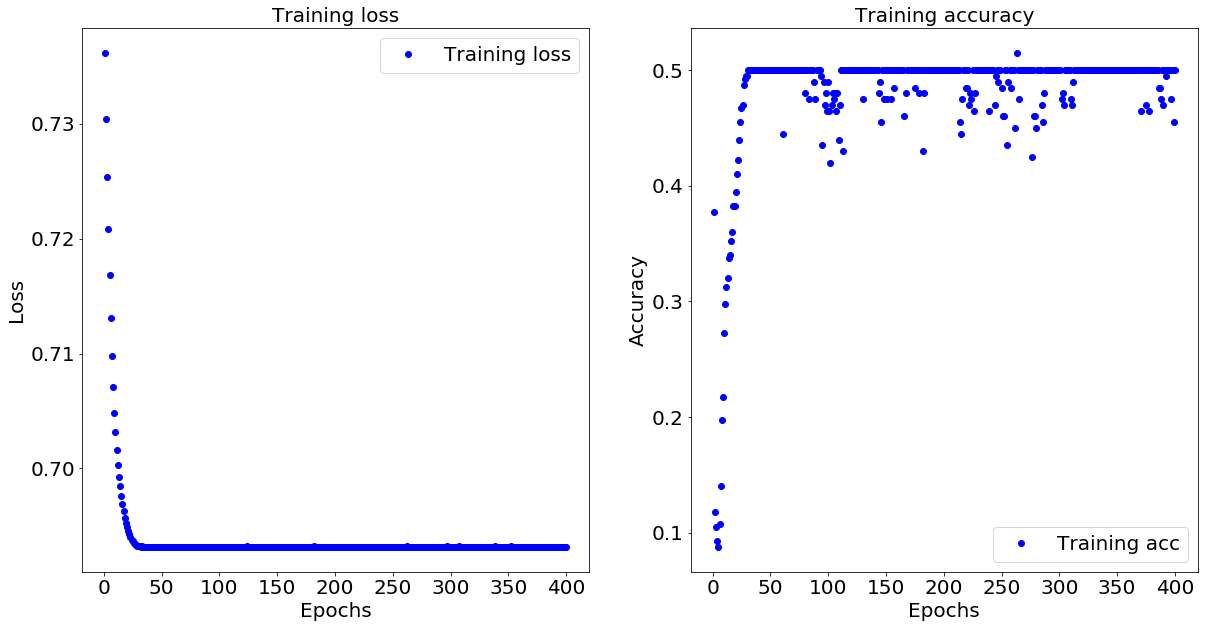

In [9]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(121)
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.subplot(122)
acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
#plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()